
We start by importing the standard libraries that we will need:

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We can read in the whole file in one line. The SCAN_NAME is in a format that pandas can directly interpret as a date-time variable and I have told read_csv which field it (the datetime) is and to use it as the index of the dataframe.

In [2]:
WindData=pd.read_csv('2023072014-17.csv',parse_dates=['date_time'],index_col='date_time',sep=';')
WindData.describe()

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw
count,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,9.115184,9.650276,10.017357,283.414195,0.772166,9.447460,0.275191,16.794213,16.750187,16.284512,981.997785,0.059768,0.086155,25.554224,503.563266,282.822065
std,1.378604,1.402887,1.315773,11.847169,1.786830,1.573637,0.555650,0.446788,0.499345,0.498803,1.879486,0.037989,0.024930,1.105251,152.881005,9.552865
min,4.778460,4.226050,4.024720,228.019000,-4.720000,3.520000,-9.060000,15.210000,15.336000,14.874400,974.532000,-0.106454,-0.054344,20.400000,8.600000,250.950000
25%,8.161580,8.709480,9.151170,278.450000,-0.420000,8.440000,-0.090000,16.490000,16.442300,15.984500,981.673000,0.040149,0.069454,25.400000,394.800000,279.525000
50%,9.135180,9.713280,10.110400,285.427000,0.570000,9.610000,0.230000,16.910000,16.850400,16.373600,982.076000,0.069678,0.084542,26.000000,504.100000,284.154000
75%,10.082000,10.700600,10.958000,290.952000,1.760000,10.610000,0.600000,17.120000,17.113600,16.648300,982.918000,0.087075,0.104308,26.200000,613.100000,287.734000
max,13.912500,13.987800,13.905900,317.293000,13.330000,17.770000,3.740000,24.790000,17.510400,17.029700,986.324000,0.178181,0.271268,27.400000,864.300000,297.839000


10 minute (or any other period) statistics are very easily obtained by resampling the dataframe (using the .resample() method and a aggregation method (e.g. .mean()).

In [3]:
WindData10min_means=WindData.resample('600s').mean()
WindData10min_means

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw
date_time,,,,,,,,,,,,,,,,
2023-07-20 14:00:00,9.670747,10.248489,10.488047,285.146724,0.666877,10.205086,0.239046,17.104716,17.031321,16.566334,984.315569,0.063859,0.074115,25.930594,555.793926,281.434075
2023-07-20 14:10:00,7.971964,8.558843,9.273043,257.228971,4.450918,7.309159,0.343047,16.277573,16.238469,15.682236,983.919935,0.002280,0.053424,25.012710,421.156700,264.607414
2023-07-20 14:20:00,7.774227,8.309724,8.940797,260.156249,3.890253,7.207151,0.295819,15.898438,15.535966,15.112622,981.776278,-0.022541,0.058925,24.224870,362.728033,257.166531
2023-07-20 14:30:00,9.301616,9.910830,10.196781,283.802362,0.784022,9.832540,0.291587,16.165505,16.008791,15.548871,981.921394,0.057978,0.076894,25.985523,520.439090,280.272750
2023-07-20 14:40:00,9.379982,9.810215,10.009281,291.794180,-0.562739,9.803191,0.163945,16.202935,16.147208,15.691972,982.460656,0.076413,0.095238,26.116260,515.857897,288.063015
2023-07-20 14:50:00,9.447338,9.842071,10.049855,293.535556,-0.886533,9.781129,0.219884,16.351842,16.336775,15.875534,982.297614,0.081896,0.103183,25.788717,524.183780,290.803912
2023-07-20 15:00:00,9.261099,9.690431,10.139021,290.168161,-0.293967,9.510234,0.302926,16.711736,16.586043,16.163987,981.963314,0.082869,0.108902,25.663633,509.093747,292.658423
2023-07-20 15:10:00,9.921288,10.497399,10.668505,288.479571,0.001984,10.485921,0.154992,16.721631,16.777925,16.300711,981.981809,0.080201,0.075277,26.201137,606.465837,284.290780
2023-07-20 15:20:00,8.433035,8.609882,8.934713,286.319865,0.257987,8.524739,0.320911,16.835637,16.758613,16.287459,981.717596,0.048087,0.106557,25.242993,383.433720,286.028112


Do standard deviations in just the same way, using .std(). You can easily do .min() and .max() as well.

In [4]:
WindData10min_stdvs=WindData.resample('600s').std()
WindData10min_stdvs

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw
date_time,,,,,,,,,,,,,,,,
2023-07-20 14:00:00,1.483603,1.320901,1.295826,4.930478,0.918985,1.346193,0.548998,0.165329,0.072388,0.060993,0.512604,0.023806,0.017907,0.637474,157.510955,2.610789
2023-07-20 14:10:00,0.986636,1.010798,0.806557,8.319292,1.015002,1.186980,0.661635,0.319588,0.306752,0.340180,0.719175,0.028667,0.019439,1.076727,73.512231,8.915314
2023-07-20 14:20:00,1.089078,1.146136,0.998782,10.855719,1.358177,1.300347,0.692536,0.264643,0.125381,0.212913,0.523364,0.021565,0.027179,1.686249,96.313099,6.794965
2023-07-20 14:30:00,1.321997,1.239463,1.086668,6.740904,1.188484,1.186040,0.537707,0.179609,0.168092,0.080682,0.645148,0.033182,0.015663,0.509788,140.298570,6.382870
2023-07-20 14:40:00,0.998214,0.843275,0.812643,5.917634,1.007566,0.881909,0.484259,0.148992,0.040298,0.060714,0.515549,0.019034,0.020446,0.280138,92.574841,5.860716
2023-07-20 14:50:00,0.902441,0.832394,0.829835,4.604287,0.759549,0.887392,0.450021,0.159753,0.072270,0.069278,0.457699,0.016328,0.012577,0.710310,91.981063,2.522313
2023-07-20 15:00:00,0.973254,1.015555,0.933449,8.767829,1.480769,1.014651,0.633100,0.222937,0.128101,0.124283,0.565509,0.020404,0.019539,1.032588,103.031515,4.470367
2023-07-20 15:10:00,1.110610,1.018092,0.945235,5.021439,0.949101,0.989860,0.475161,0.135378,0.051725,0.035127,0.285366,0.016739,0.013954,0.187498,110.295910,3.172584
2023-07-20 15:20:00,1.359161,1.364538,1.289427,7.552288,1.134987,1.430341,0.518948,0.215485,0.069975,0.045229,0.965078,0.031975,0.017617,1.129103,148.476093,2.919078


To calculate the turbulence intensities, you need both the means and simultaneous standard deviations for each 10 minute period. One way is like this..

In [5]:
for ind in WindData10min_means.index:
    print(ind, WindData10min_stdvs["Wsp_18m"][ind]/WindData10min_means["Wsp_18m"][ind]*100)

2023-07-20 14:00:00 15.341141550832106
2023-07-20 14:10:00 12.376319093314
2023-07-20 14:20:00 14.008821482356925
2023-07-20 14:30:00 14.21255726143601
2023-07-20 14:40:00 10.641965517881944
2023-07-20 14:50:00 9.552326081090078
2023-07-20 15:00:00 10.509057831730694
2023-07-20 15:10:00 11.194209438999922
2023-07-20 15:20:00 16.117102321899786
2023-07-20 15:30:00 12.467356819457654
2023-07-20 15:40:00 12.292195596072604
2023-07-20 15:50:00 12.327012684101556
2023-07-20 16:00:00 9.845853180518827
2023-07-20 16:10:00 12.399221660494344
2023-07-20 16:20:00 11.778410707112421
2023-07-20 16:30:00 11.978438095158332
2023-07-20 16:40:00 10.848913329492223
2023-07-20 16:50:00 14.868038000025638
2023-07-20 17:00:00 9.662871520332969
2023-07-20 17:10:00 nan


A more direct way is to just operate directly on the two dataframes. Because they are resampled from the same original dataset, the indexing will refer to identical time periods (check if you aren't sure).

In [6]:
TIs_18m=WindData10min_stdvs["Wsp_18m"]/WindData10min_means["Wsp_18m"]*100
## This is a series, not a dataframe

In [7]:
## Here we make a TIs dataframe where we can also collect the other TI's 
TIs=pd.DataFrame(TIs_18m)

In [8]:
TIs=TIs.merge(WindData10min_stdvs["Wsp_44m"]/WindData10min_means["Wsp_44m"]*100,left_index=True, right_index=True)
TIs=TIs.merge(WindData10min_stdvs["Wsp_70m"]/WindData10min_means["Wsp_70m"]*100,left_index=True, right_index=True)
TIs

,Wsp_18m,Wsp_44m,Wsp_70m
date_time,,,
2023-07-20 14:00:00,15.341142,12.888740,12.355267
2023-07-20 14:10:00,12.376319,11.809978,8.697872
2023-07-20 14:20:00,14.008821,13.792710,11.171061
2023-07-20 14:30:00,14.212557,12.506145,10.656972
2023-07-20 14:40:00,10.641966,8.595889,8.118891
2023-07-20 14:50:00,9.552326,8.457513,8.257182
2023-07-20 15:00:00,10.509058,10.479976,9.206501
2023-07-20 15:10:00,11.194209,9.698521,8.860054
2023-07-20 15:20:00,16.117102,15.848513,14.431656


### Working with the faste-sampled data

### 1)

In [9]:
WindData

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw
date_time,,,,,,,,,,,,,,,,
2023-07-20 14:00:00.020,9.35336,9.25720,8.95805,285.717,0.53,9.32,0.03,17.02,17.0335,16.6292,984.017,0.028774,0.075951,26.1,375.1,276.165
2023-07-20 14:00:00.040,9.35336,9.25720,8.95805,285.655,0.49,9.37,-0.13,17.08,17.0335,16.6254,983.980,0.027895,0.076316,26.1,374.0,276.165
2023-07-20 14:00:00.060,9.32394,9.28623,9.05947,285.575,0.49,9.37,-0.13,17.08,17.0412,16.6254,983.907,0.026971,0.076689,26.1,374.0,276.165
2023-07-20 14:00:00.080,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0412,16.6254,983.907,0.026233,0.077821,26.1,374.0,276.165
2023-07-20 14:00:00.100,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0335,16.6215,983.907,0.025511,0.077918,26.1,374.0,276.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-20 17:09:59.920,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.109382,0.081077,26.2,711.6,286.719
2023-07-20 17:09:59.940,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.110708,0.080228,26.2,711.6,286.719
2023-07-20 17:09:59.960,11.02490,11.57410,12.16320,290.521,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.509,0.111751,0.079147,26.2,711.6,286.719


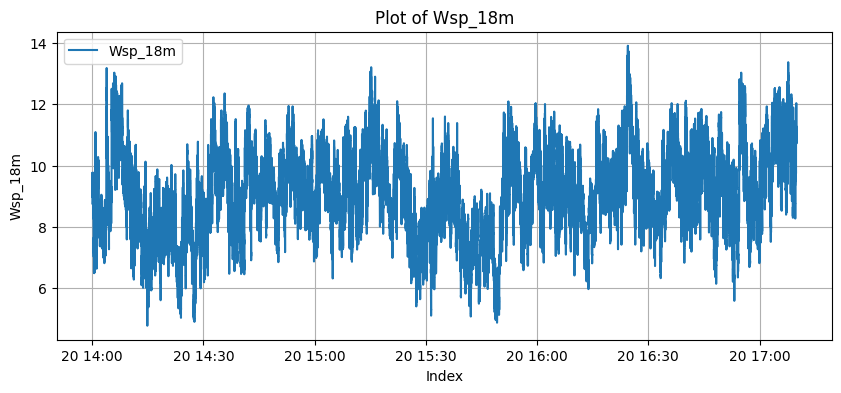

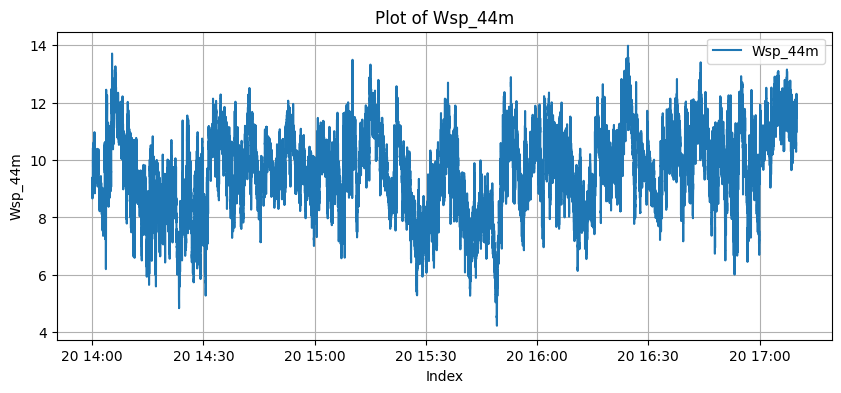

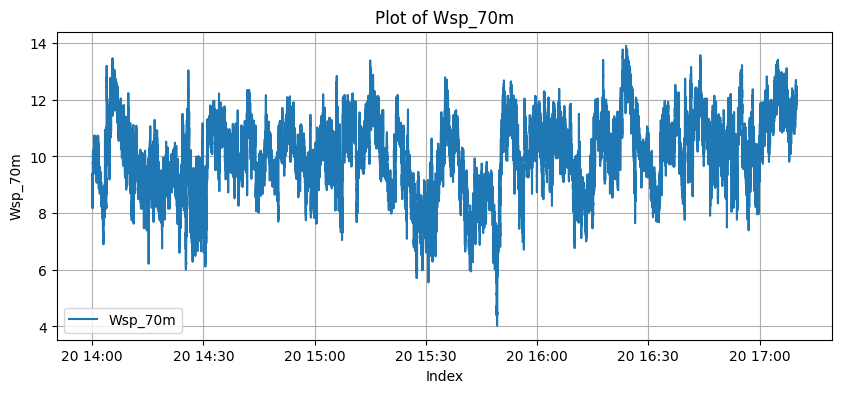

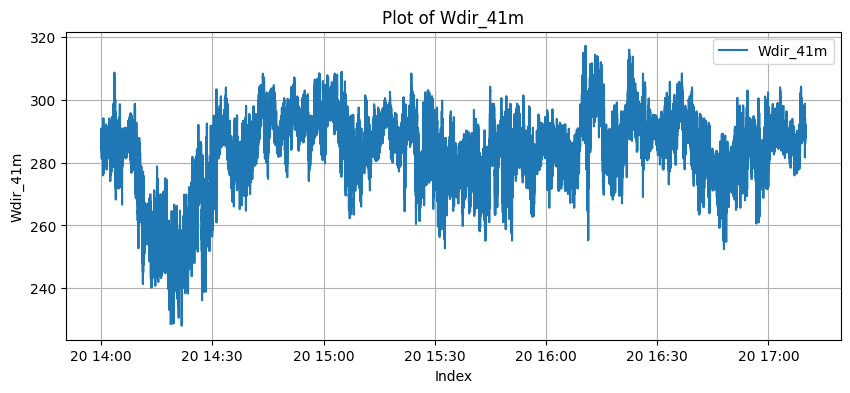

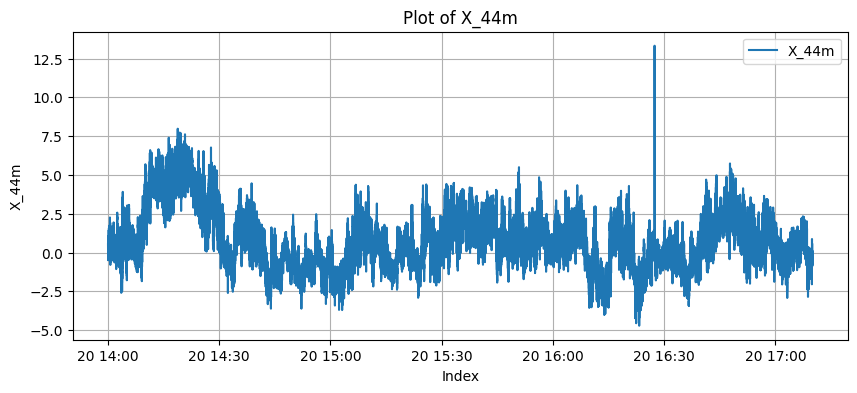

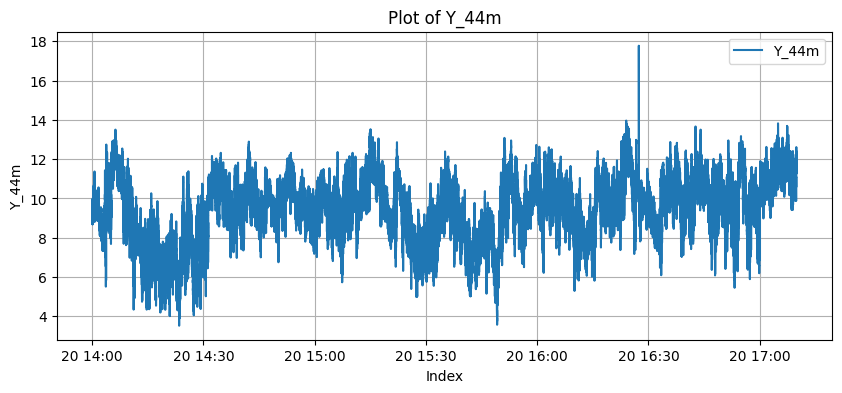

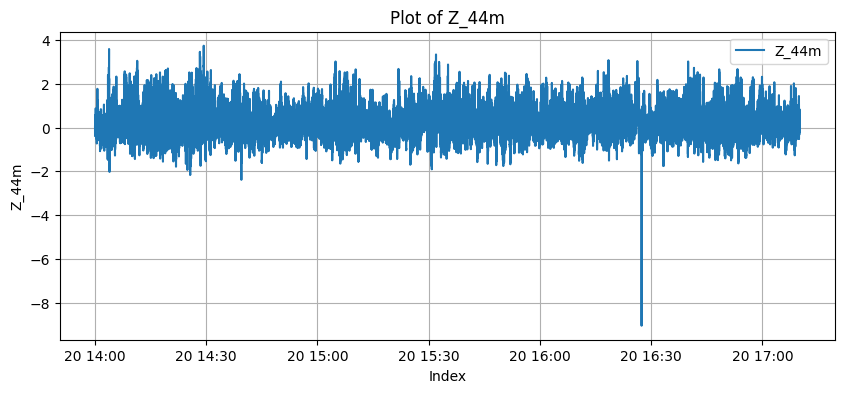

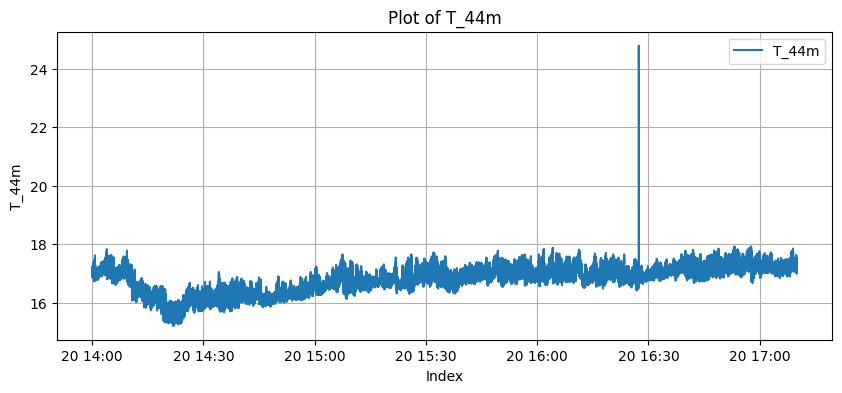

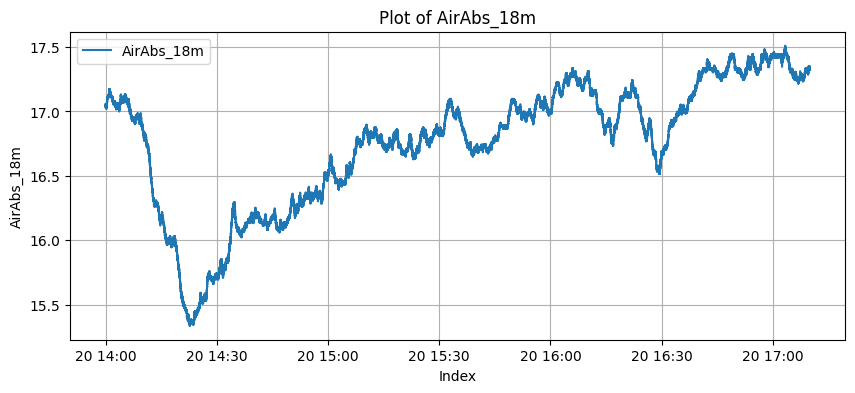

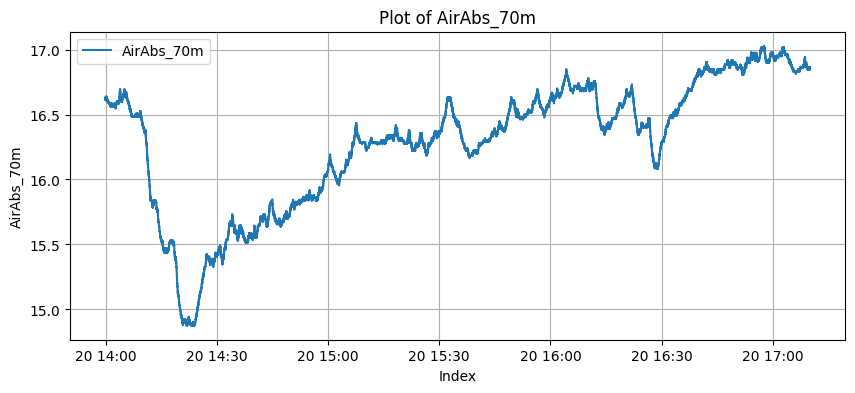

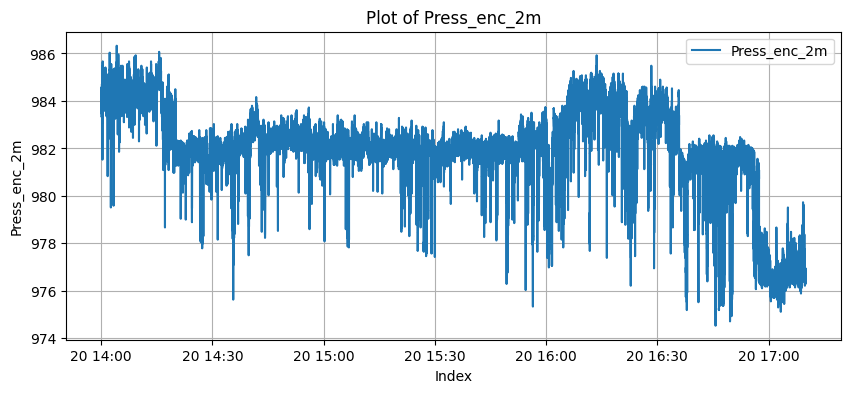

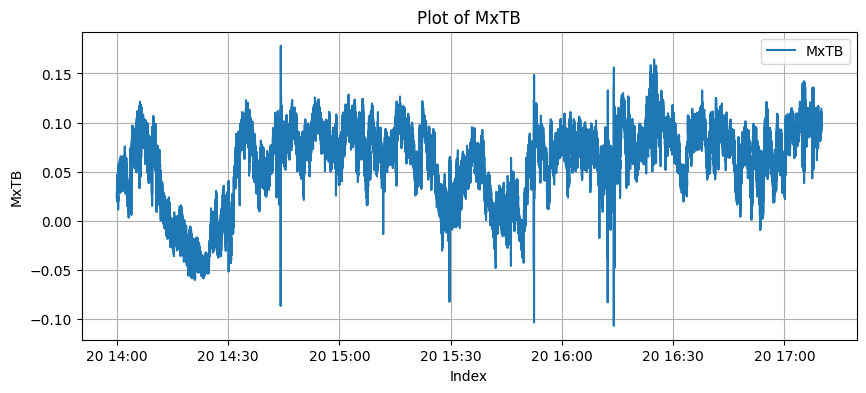

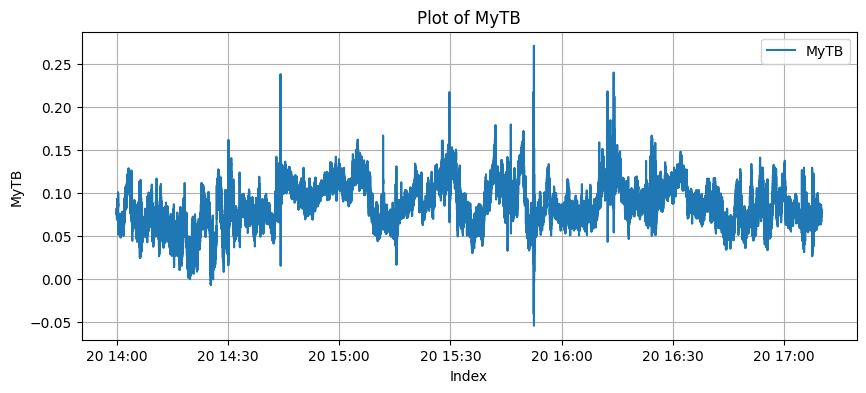

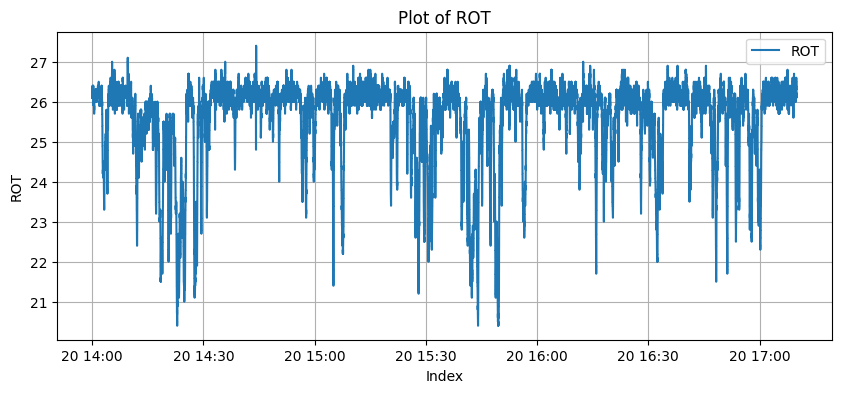

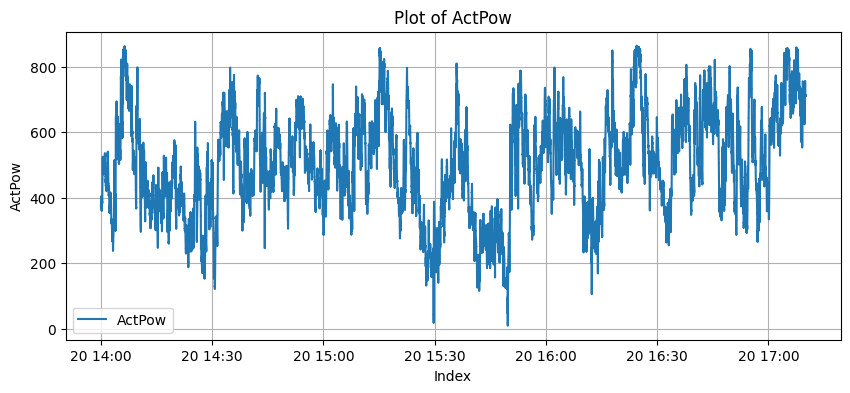

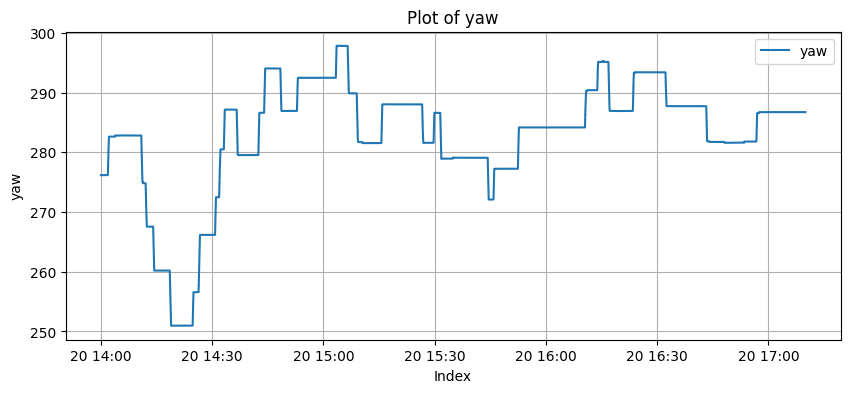

In [10]:
for column in WindData.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(WindData.index, WindData[column], label=column)
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"Plot of {column}")
    plt.legend()
    plt.grid(True)
    plt.show()

### 2)

In [11]:
WindData

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw
date_time,,,,,,,,,,,,,,,,
2023-07-20 14:00:00.020,9.35336,9.25720,8.95805,285.717,0.53,9.32,0.03,17.02,17.0335,16.6292,984.017,0.028774,0.075951,26.1,375.1,276.165
2023-07-20 14:00:00.040,9.35336,9.25720,8.95805,285.655,0.49,9.37,-0.13,17.08,17.0335,16.6254,983.980,0.027895,0.076316,26.1,374.0,276.165
2023-07-20 14:00:00.060,9.32394,9.28623,9.05947,285.575,0.49,9.37,-0.13,17.08,17.0412,16.6254,983.907,0.026971,0.076689,26.1,374.0,276.165
2023-07-20 14:00:00.080,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0412,16.6254,983.907,0.026233,0.077821,26.1,374.0,276.165
2023-07-20 14:00:00.100,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0335,16.6215,983.907,0.025511,0.077918,26.1,374.0,276.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-20 17:09:59.920,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.109382,0.081077,26.2,711.6,286.719
2023-07-20 17:09:59.940,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.110708,0.080228,26.2,711.6,286.719
2023-07-20 17:09:59.960,11.02490,11.57410,12.16320,290.521,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.509,0.111751,0.079147,26.2,711.6,286.719


In [12]:
WindData['ins_hoe_speed'] = (WindData['X_44m']**2 + WindData['Y_44m']**2)**(1/2)

In [13]:
WindData

,Wsp_18m,Wsp_44m,Wsp_70m,Wdir_41m,X_44m,Y_44m,Z_44m,T_44m,AirAbs_18m,AirAbs_70m,Press_enc_2m,MxTB,MyTB,ROT,ActPow,yaw,ins_hoe_speed
date_time,,,,,,,,,,,,,,,,,
2023-07-20 14:00:00.020,9.35336,9.25720,8.95805,285.717,0.53,9.32,0.03,17.02,17.0335,16.6292,984.017,0.028774,0.075951,26.1,375.1,276.165,9.335058
2023-07-20 14:00:00.040,9.35336,9.25720,8.95805,285.655,0.49,9.37,-0.13,17.08,17.0335,16.6254,983.980,0.027895,0.076316,26.1,374.0,276.165,9.382803
2023-07-20 14:00:00.060,9.32394,9.28623,9.05947,285.575,0.49,9.37,-0.13,17.08,17.0412,16.6254,983.907,0.026971,0.076689,26.1,374.0,276.165,9.382803
2023-07-20 14:00:00.080,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0412,16.6254,983.907,0.026233,0.077821,26.1,374.0,276.165,9.241304
2023-07-20 14:00:00.100,9.32394,9.28623,9.05947,285.575,0.76,9.21,-0.01,17.09,17.0335,16.6215,983.907,0.025511,0.077918,26.1,374.0,276.165,9.241304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-20 17:09:59.920,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.109382,0.081077,26.2,711.6,286.719,11.507306
2023-07-20 17:09:59.940,11.03670,11.57410,12.16320,290.965,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.583,0.110708,0.080228,26.2,711.6,286.719,11.507306
2023-07-20 17:09:59.960,11.02490,11.57410,12.16320,290.521,-0.41,11.50,0.09,17.09,17.3273,16.8504,976.509,0.111751,0.079147,26.2,711.6,286.719,11.507306


### 3)

In [32]:
WindData['sonic_wd'] = np.mod(np.arctan2(-WindData['Y_44m'], -WindData['X_44m'])*180/np.pi, 360)

In [33]:
WindData[['sonic_wd', 'Wdir_41m']]

,sonic_wd,Wdir_41m
date_time,,
2023-07-20 14:00:00.020,266.745269,285.717
2023-07-20 14:00:00.040,267.006469,285.655
2023-07-20 14:00:00.060,267.006469,285.575
2023-07-20 14:00:00.080,265.282697,285.575
2023-07-20 14:00:00.100,265.282697,285.575
...,...,...
2023-07-20 17:09:59.920,272.041854,290.965
2023-07-20 17:09:59.940,272.041854,290.965
2023-07-20 17:09:59.960,272.041854,290.521


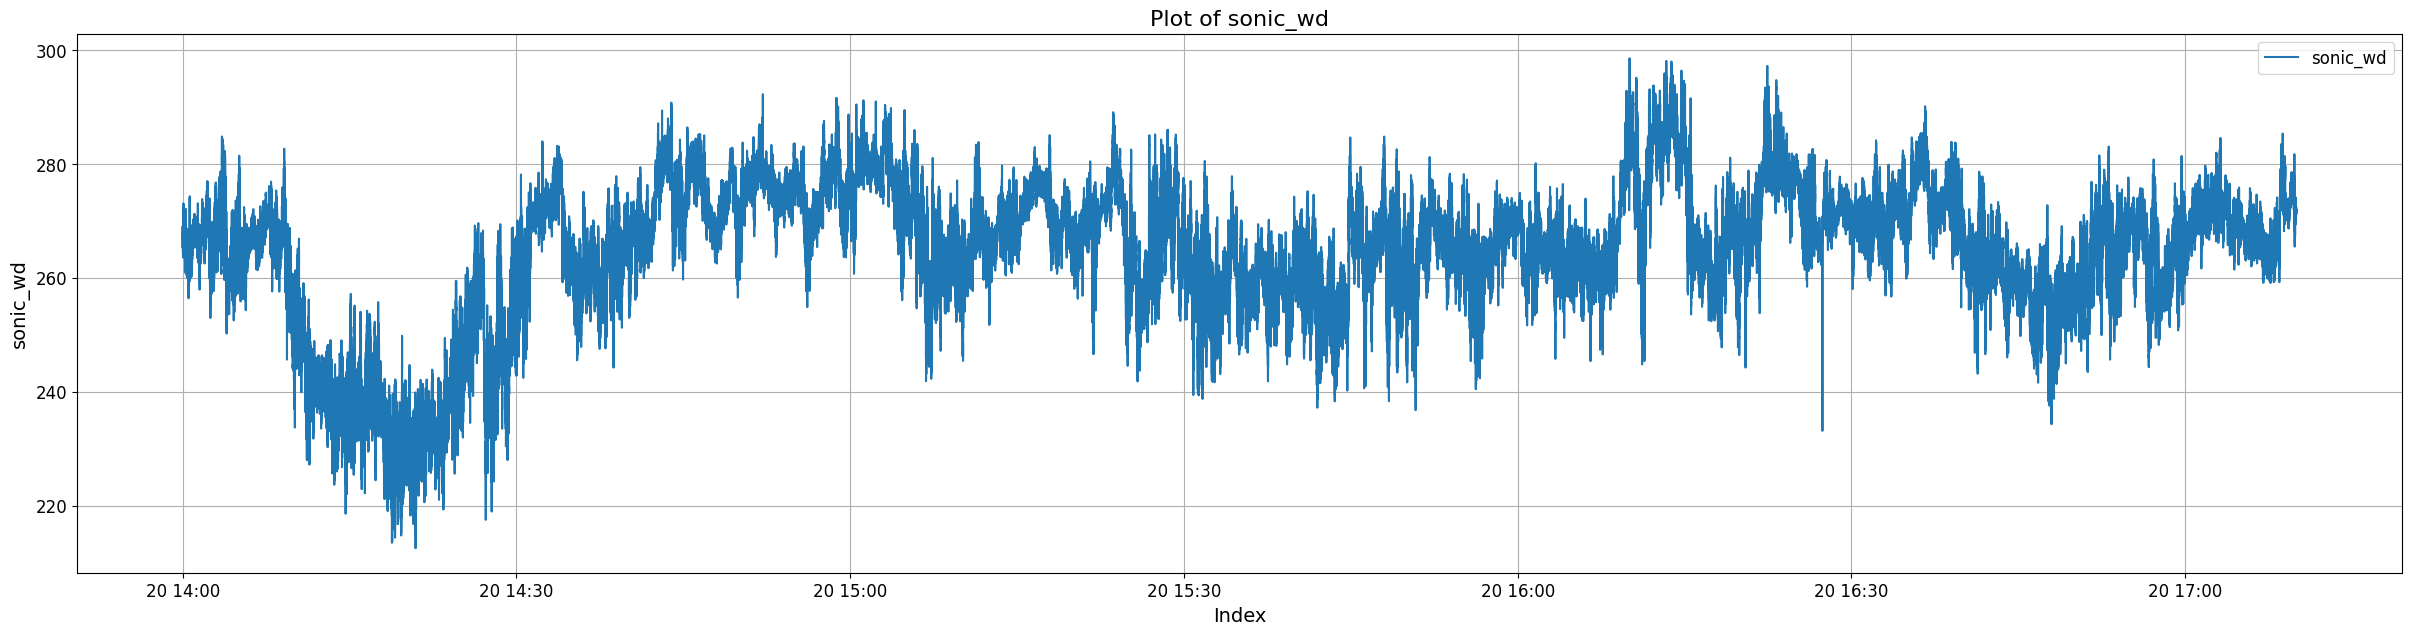

In [39]:
plt.figure(figsize=(30, 7))  # Make the plot wider
plt.plot(WindData['sonic_wd'], label='sonic_wd')

# Increase font size of the axis labels and title
plt.xlabel("Index", fontsize=14)
plt.ylabel('sonic_wd', fontsize=14)
plt.title(f"Plot of sonic_wd", fontsize=16)

# Increase font size of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.grid(True)

plt.show()


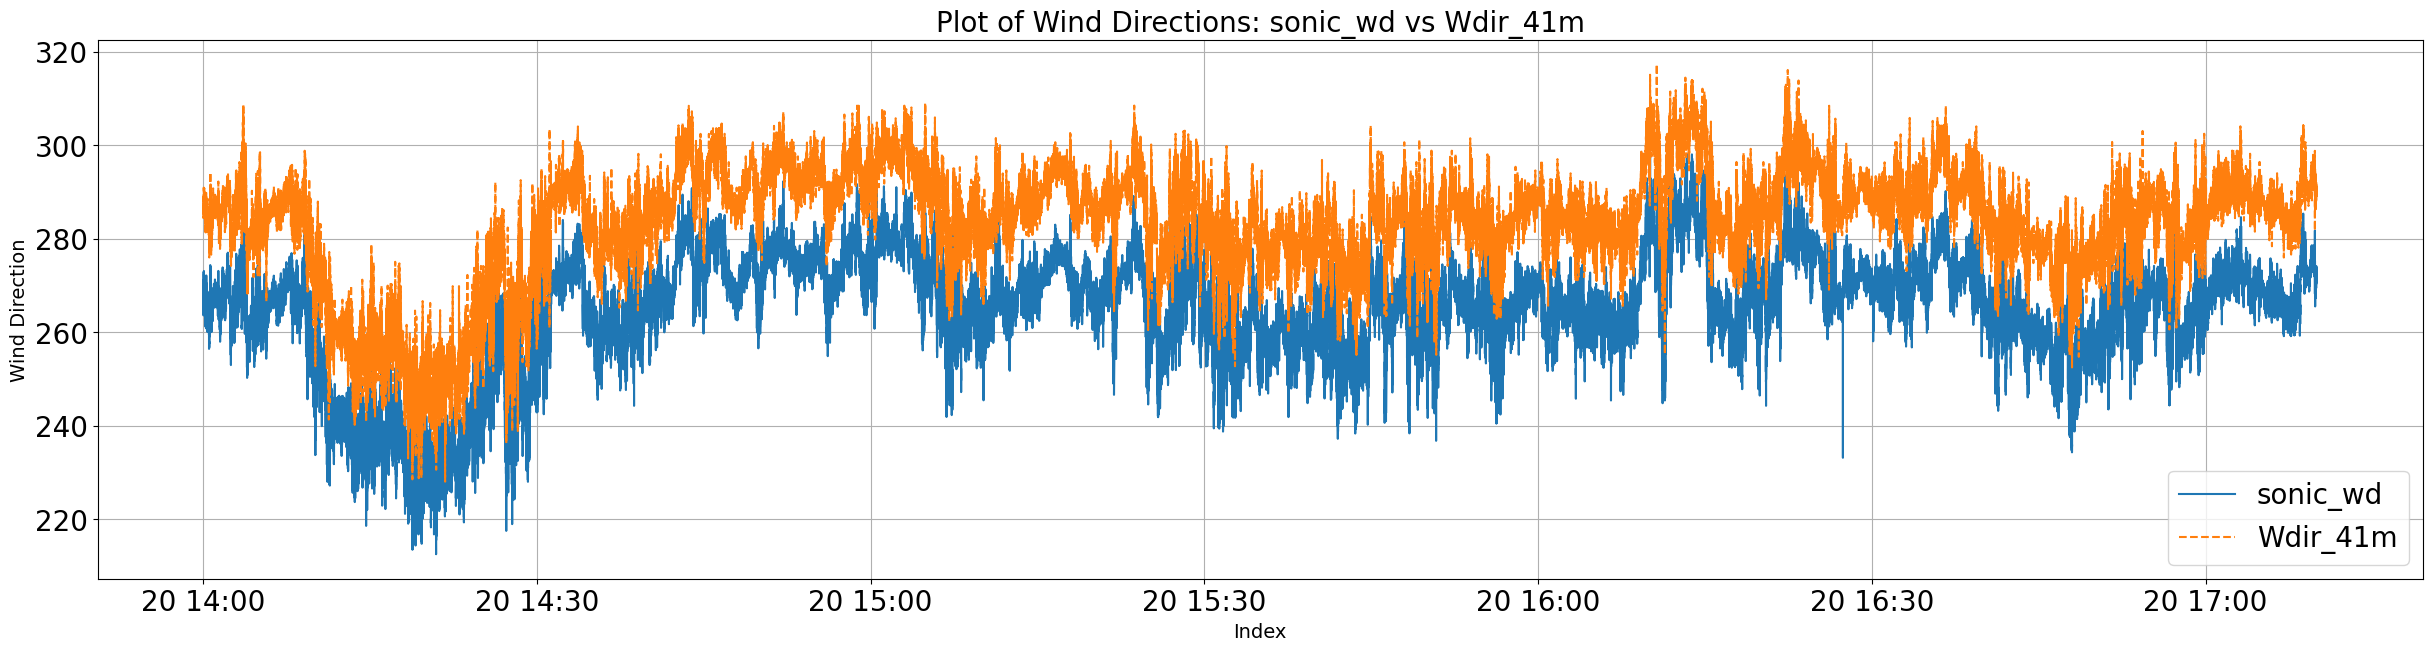

In [42]:
plt.figure(figsize=(30, 7))  # Make the plot wider

# Plot the first dataset
plt.plot(WindData['sonic_wd'], label='sonic_wd')

# Plot the second dataset
plt.plot(WindData['Wdir_41m'], label='Wdir_41m', linestyle='--')  # Use a dashed line for distinction

# Increase font size of the axis labels and title
plt.xlabel("Index", fontsize=14)
plt.ylabel('Wind Direction', fontsize=14)
plt.title("Plot of Wind Directions: sonic_wd vs Wdir_41m", fontsize=20)

# Increase font size of the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)

plt.show()


### 4)

In [43]:
WindData = WindData.rename(columns={'MxTB': 'temp', 'MyTB': 'MxTB', 'temp': 'MyTB'})

tryingm